In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the csv files
df=pd.read_csv("titanic.csv")
df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
# Creqating a new column family in the dataset by adding SibSp column and Parch column
df["Family"]=df["SibSp"]+df["Parch"]
df.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  Family  
0      0  A/5 21171   7.2500   NaN        S       1  
1      0   PC 17599  71.2833   C85        C       1

In [4]:
# ticket column can be ignored as it is a random number , we can skip the column in the for the analysis

In [5]:
df.Family.describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Family, dtype: float64

In [6]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [7]:
# Based on categories, we will analyze which category has high survivability
## Low,Mid,Mid-Hing,High
df["Fare_category"]=pd.cut(df.Fare,bins=[0,7.9,14.45,31.00,512],labels=["Low","Mid","Mid-High","High"])
df["Fare_category"].head(5)

0     Low
1    High
2     Mid
3    High
4     Mid
Name: Fare_category, dtype: category
Categories (4, object): [Low < Mid < Mid-High < High]

In [8]:
# comparing the fare with fare category
df[["Fare","Fare_category"]]

Fare Fare_category
0     7.2500           Low
1    71.2833          High
2     7.9250           Mid
3    53.1000          High
4     8.0500           Mid
..       ...           ...
886  13.0000           Mid
887  30.0000      Mid-High
888  23.4500      Mid-High
889  30.0000      Mid-High
890   7.7500           Low

[891 rows x 2 columns]

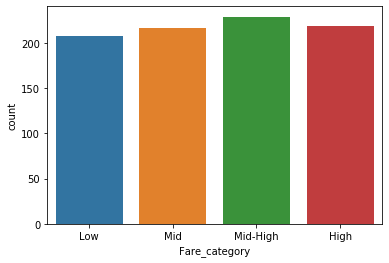

In [9]:
## visualizing the fare category
## count plor gives the entire count of the category--> category of survived and deceased
sns.countplot(x="Fare_category",data=df)
# People are approximately of equal majority

Text(0.5, 1.0, 'Survival based on fare category')

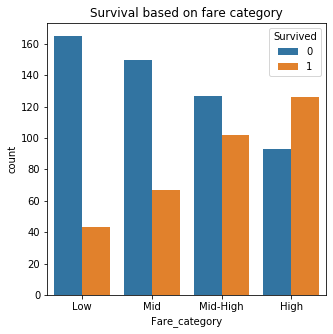

In [10]:
## visualizing the survived category
plt.figure(figsize=(5,5))
sns.countplot(x="Fare_category",hue="Survived",data=df).set_title("Survival based on fare category")

In [11]:
## Embarked Port --> from which port they have borded the ship
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

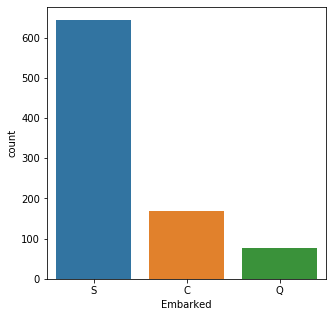

In [13]:
## Visualizing the Port column
plt.figure(figsize=(5,5))
sns.countplot(x="Embarked",data=df)

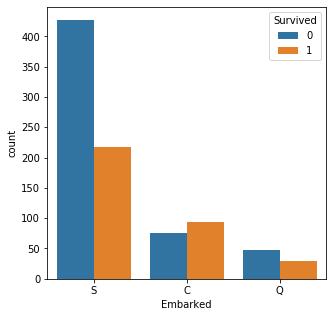

In [14]:
## visualizing the port columns ,s-
plt.figure(figsize=(5,5))
sns.countplot(x="Embarked",hue="Survived",data=df)

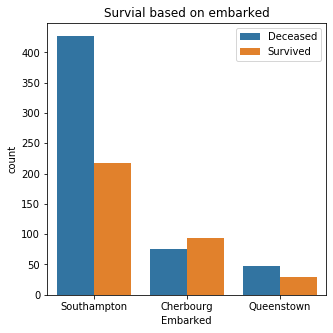

In [15]:
## visualizing the port columns ,s-
plt.figure(figsize=(5,5))
p=sns.countplot(x="Embarked",hue="Survived",data=df)
p.set_xticklabels(["Southampton","Cherbourg","Queenstown"])
p.set_title("Survial based on embarked")
p.legend(labels=["Deceased","Survived"])

In [16]:
# imputing with missing values
df.isnull().mean().sort_values(ascending=False)

Cabin            0.771044
Age              0.198653
Fare_category    0.020202
Embarked         0.002245
Family           0.000000
Fare             0.000000
Ticket           0.000000
Parch            0.000000
SibSp            0.000000
Sex              0.000000
Name             0.000000
Pclass           0.000000
Survived         0.000000
PassengerId      0.000000
dtype: float64

In [17]:
## Cabin --> 77% is missing we are going to create a new category as 
df.Cabin.fillna("NA",inplace=True)
df.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  Family Fare_category  
0      0  A/5 21171   7.2500    NA        S       1           Low  
1      0   PC 17599  71.2833   C85        C       1          High

In [18]:
df.Cabin.isnull().sum()

0

In [19]:
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [20]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
# Median -->Sorting the ages from 0-80 and replacing Nan with the median of age column
df.Age.fillna(df.Age.median(),inplace=True)
df.Age.isnull().sum()

0

In [22]:
## imputing embarked columns
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)
df.Embarked.isnull().sum()

0

In [23]:
df.Fare_category.isnull().sum()

18

In [24]:
## imputing fare columns
df.Fare_category.fillna(df.Fare_category.mode()[0],inplace=True)
df.Fare_category.isnull().sum()

0

In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Family           0
Fare_category    0
dtype: int64

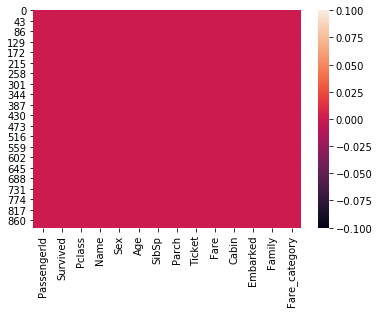

In [26]:
sns.heatmap(df.isnull())

In [27]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Family Fare_category  
0      0         A/5 21171   7.2500    NA        S       1           Low  
1      0          PC 17599  71.2833   C85        C       1          High  
2      0  STON/O2. 3101282   7.9250    NA        S       0           Mid  
3      0            113803  53.1000  C123        S       1          High  
4      0            373450   8.0500    NA        S       0           Mid

In [28]:
df["Age-Range"]=pd.cut(df.Age,bins=[0,10,20,30,40,60,80])
df[["Age","Age-Range"]].head()

Age Age-Range
0  22.0  (20, 30]
1  38.0  (30, 40]
2  26.0  (20, 30]
3  35.0  (30, 40]
4  35.0  (30, 40]

In [29]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Family Fare_category  \
0      0         A/5 21171   7.2500    NA        S       1           Low   
1      0          PC 17599  71.2833   C85        C       1          High   
2      0  STON/O2. 3101282   7.9250    NA        S       0           Mid   
3      0            113803  53.1000  C123        S       1          High   
4      0            373450   8.0500    NA        S       0           Mid   

  Age-Range  
0  (20, 30]  
1  (30, 40]  
2  (20, 30]  
3  (30, 40]  
4  (30, 40]

In [30]:
dummy_set=pd.get_dummies(df.Fare_category,drop_first=True)
# n columns are created we need to have n-1 dummy columns
dummy_set

Mid  Mid-High  High
0      0         0     0
1      0         0     1
2      1         0     0
3      0         0     1
4      1         0     0
..   ...       ...   ...
886    1         0     0
887    0         1     0
888    0         1     0
889    0         1     0
890    0         0     0

[891 rows x 3 columns]

In [31]:
df=pd.concat([df,dummy_set],axis=1)

In [32]:
# Ecndoinng of categorical variables
df = pd.concat([df,pd.get_dummies(df.Cabin,prefix="Cabin",drop_first=True),
                    pd.get_dummies(df.Embarked,prefix='Emb',drop_first=True),
                    pd.get_dummies(df.Fare_category,prefix="Fare",drop_first=True),
                    pd.get_dummies(df['Age-Range'],drop_first=True) ]   ,axis=1)
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  ... Emb_Q Emb_S  Fare_Mid Fare_Mid-High  \
0      0         A/5 21171   7.2500  ...     0     1         0             0   
1      0          PC 17599  71.2833  ...     0     0         0             0   
2      0  STON/O2. 3101282   7.9250  ...     0     1         1             0   
3      0            113803  53.1000  ...     0     1         0             0   
4      0            373450   8.0500  ...     0     1         1             0   

  Fare_High  (10, 20]  (20, 30]  (30, 40]  (40, 60]  (60, 80]  
0         0         0         1         0         0         0  
1         1         0         0         1         0         0  
2         0         0         1         0         0         0  
3         1         0         0         1         0         0  
4         0         0         0         1         0         0  

[5 rows x 175 columns]

In [33]:
# label encoder
from sklearn.preprocessing import LabelEncoder
df['Sex']=LabelEncoder().fit_transform(df.Sex)
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  ... Emb_Q Emb_S  Fare_Mid Fare_Mid-High  \
0         A/5 21171   7.2500  ...     0     1         0             0   
1          PC 17599  71.2833  ...     0     0         0             0   
2  STON/O2. 3101282   7.9250  ...     0     1         1             0   
3            113803  53.1000  ...     0     1         0             0   
4            373450   8.0500  ...     0     1         1             0   

  Fare_High  (10, 20]  (20, 30]  (30, 40]  (40, 60]  (60, 80]  
0         0         0         1         0         0         0  
1         1         0         0         1         0         0  
2         0         0         1         0         0         0  
3         1         0         0         1         0         0  
4         0         0         0         1         0         0  

[5 rows x 175 columns]

In [34]:
df.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Embarked','Cabin','Age-Range'],axis=1,inplace=True)
df


Survived  Pclass  Sex  Family Fare_category  Mid  Mid-High  High  \
0           0       3    1       1           Low    0         0     0   
1           1       1    0       1          High    0         0     1   
2           1       3    0       0           Mid    1         0     0   
3           1       1    0       1          High    0         0     1   
4           0       3    1       0           Mid    1         0     0   
..        ...     ...  ...     ...           ...  ...       ...   ...   
886         0       2    1       0           Mid    1         0     0   
887         1       1    0       0      Mid-High    0         1     0   
888         0       3    0       3      Mid-High    0         1     0   
889         1       1    1       0      Mid-High    0         1     0   
890         0       3    1       0           Low    0         0     0   

     Cabin_A14  Cabin_A16  ...  Emb_Q  Emb_S  Fare_Mid  Fare_Mid-High  \
0            0          0  ...      0      1         0              0   
1            0          0  ...      0      0         0              0   
2            0          0  ...      0      1         1              0   
3            0          0  ...      0      1         0              0   
4            0          0  ...      0      1         1              0   
..         ...        ...  ...    ...    ...       ...            ...   
886          0          0  ...      0      1         1              0   
887          0          0  ...      0      1         0              1   
888          0          0  ...      0      1         0              1   
889          0          0  ...      0      0         0              1   
890          0          0  ...      1      0         0              0   

     Fare_High  (10, 20]  (20, 30]  (30, 40]  (40, 60]  (60, 80]  
0            0         0         1         0         0         0  
1            1         0         0         1         0         0  
2            0         0         1         0         0         0  
3            1         0         0         1         0         0  
4            0         0         0         1         0         0  
..         ...       ...       ...       ...       ...       ...  
886          0         0         1         0         0         0  
887          0         1         0         0         0         0  
888          0         0         1         0         0         0  
889          0         0         1         0         0         0  
890          0         0         0         1         0         0  

[891 rows x 165 columns]

In [35]:
df.drop(["Fare_category"],axis=1,inplace=True)

In [36]:
df

Survived  Pclass  Sex  Family  Mid  Mid-High  High  Cabin_A14  Cabin_A16  \
0           0       3    1       1    0         0     0          0          0   
1           1       1    0       1    0         0     1          0          0   
2           1       3    0       0    1         0     0          0          0   
3           1       1    0       1    0         0     1          0          0   
4           0       3    1       0    1         0     0          0          0   
..        ...     ...  ...     ...  ...       ...   ...        ...        ...   
886         0       2    1       0    1         0     0          0          0   
887         1       1    0       0    0         1     0          0          0   
888         0       3    0       3    0         1     0          0          0   
889         1       1    1       0    0         1     0          0          0   
890         0       3    1       0    0         0     0          0          0   

     Cabin_A19  ...  Emb_Q  Emb_S  Fare_Mid  Fare_Mid-High  Fare_High  \
0            0  ...      0      1         0              0          0   
1            0  ...      0      0         0              0          1   
2            0  ...      0      1         1              0          0   
3            0  ...      0      1         0              0          1   
4            0  ...      0      1         1              0          0   
..         ...  ...    ...    ...       ...            ...        ...   
886          0  ...      0      1         1              0          0   
887          0  ...      0      1         0              1          0   
888          0  ...      0      1         0              1          0   
889          0  ...      0      0         0              1          0   
890          0  ...      1      0         0              0          0   

     (10, 20]  (20, 30]  (30, 40]  (40, 60]  (60, 80]  
0           0         1         0         0         0  
1           0         0         1         0         0  
2           0         1         0         0         0  
3           0         0         1         0         0  
4           0         0         1         0         0  
..        ...       ...       ...       ...       ...  
886         0         1         0         0         0  
887         1         0         0         0         0  
888         0         1         0         0         0  
889         0         1         0         0         0  
890         0         0         1         0         0  

[891 rows x 164 columns]

In [37]:
df.dtypes

Survived    int64
Pclass      int64
Sex         int32
Family      int64
Mid         uint8
            ...  
(10, 20]    uint8
(20, 30]    uint8
(30, 40]    uint8
(40, 60]    uint8
(60, 80]    uint8
Length: 164, dtype: object

In [38]:
## Standard scalar -> not required for this(Distance based algorithms)

In [39]:
## saperating the Input and output Data
X= df.drop("Survived",axis=1)
X.shape

(891, 163)

In [40]:
## output model
y=df.iloc[:,0]
y.shape

(891,)

In [41]:
## input and output into thraining data and testing data
# training --> we will train the model on training data
## testing --> check the performance of the model

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)
#to preent the random repetation to come  pd.DataFrame(sample)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 163)
(223, 163)
(668,)
(223,)


In [44]:
X_train

Pclass  Sex  Family  Mid  Mid-High  High  Cabin_A14  Cabin_A16  \
35        1    1       1    0         0     1          0          0   
46        3    1       1    0         1     0          0          0   
453       1    1       1    0         0     1          0          0   
291       1    0       1    0         0     1          0          0   
748       1    1       1    0         0     1          0          0   
..      ...  ...     ...  ...       ...   ...        ...        ...   
715       3    1       0    0         0     0          0          0   
767       3    0       0    0         0     0          0          0   
72        2    1       0    0         0     1          0          0   
235       3    0       0    0         0     0          0          0   
37        3    1       0    1         0     0          0          0   

     Cabin_A19  Cabin_A20  ...  Emb_Q  Emb_S  Fare_Mid  Fare_Mid-High  \
35           0          0  ...      0      1         0              0   
46           0          0  ...      1      0         0              1   
453          0          0  ...      0      0         0              0   
291          0          0  ...      0      0         0              0   
748          0          0  ...      0      1         0              0   
..         ...        ...  ...    ...    ...       ...            ...   
715          0          0  ...      0      1         0              0   
767          0          0  ...      1      0         0              0   
72           0          0  ...      0      1         0              0   
235          0          0  ...      0      1         0              0   
37           0          0  ...      0      1         1              0   

     Fare_High  (10, 20]  (20, 30]  (30, 40]  (40, 60]  (60, 80]  
35           1         0         0         0         1         0  
46           0         0         1         0         0         0  
453          1         0         0         0         1         0  
291          1         1         0         0         0         0  
748          1         1         0         0         0         0  
..         ...       ...       ...       ...       ...       ...  
715          0         1         0         0         0         0  
767          0         0         0         1         0         0  
72           1         0         1         0         0         0  
235          0         0         1         0         0         0  
37           0         0         1         0         0         0  

[668 rows x 163 columns]

In [45]:
y_train

35     0
46     0
453    1
291    1
748    0
      ..
715    0
767    0
72     0
235    0
37     0
Name: Survived, Length: 668, dtype: int64

# 20-06-2020

In [46]:
X_test

Pclass  Sex  Family  Mid  Mid-High  High  Cabin_A14  Cabin_A16  \
862       1    0       0    0         1     0          0          0   
223       3    1       0    0         0     0          0          0   
84        2    0       0    1         0     0          0          0   
680       3    0       0    1         0     0          0          0   
535       2    0       2    0         1     0          0          0   
..      ...  ...     ...  ...       ...   ...        ...        ...   
506       2    0       2    0         1     0          0          0   
467       1    1       0    0         1     0          0          0   
740       1    1       0    0         1     0          0          0   
354       3    1       0    0         0     0          0          0   
449       1    1       0    0         1     0          0          0   

     Cabin_A19  Cabin_A20  ...  Emb_Q  Emb_S  Fare_Mid  Fare_Mid-High  \
862          0          0  ...      0      1         0              1   
223          0          0  ...      0      1         0              0   
84           0          0  ...      0      1         1              0   
680          0          0  ...      1      0         1              0   
535          0          0  ...      0      1         0              1   
..         ...        ...  ...    ...    ...       ...            ...   
506          0          0  ...      0      1         0              1   
467          0          0  ...      0      1         0              1   
740          0          0  ...      0      1         0              1   
354          0          0  ...      0      0         0              0   
449          0          0  ...      0      1         0              1   

     Fare_High  (10, 20]  (20, 30]  (30, 40]  (40, 60]  (60, 80]  
862          0         0         0         0         1         0  
223          0         0         1         0         0         0  
84           0         1         0         0         0         0  
680          0         0         1         0         0         0  
535          0         0         0         0         0         0  
..         ...       ...       ...       ...       ...       ...  
506          0         0         0         1         0         0  
467          0         0         0         0         1         0  
740          0         0         1         0         0         0  
354          0         0         1         0         0         0  
449          0         0         0         0         1         0  

[223 rows x 163 columns]

In [47]:
y_test

862    1
223    0
84     1
680    0
535    1
      ..
506    1
467    0
740    1
354    0
449    1
Name: Survived, Length: 223, dtype: int64

In [48]:
## To display all the columns 
pd.set_option("display.max_columns",None) 
# if we give 50 in place of none it will print only 50 columns 
df

Survived  Pclass  Sex  Family  Mid  Mid-High  High  Cabin_A14  Cabin_A16  \
0           0       3    1       1    0         0     0          0          0   
1           1       1    0       1    0         0     1          0          0   
2           1       3    0       0    1         0     0          0          0   
3           1       1    0       1    0         0     1          0          0   
4           0       3    1       0    1         0     0          0          0   
..        ...     ...  ...     ...  ...       ...   ...        ...        ...   
886         0       2    1       0    1         0     0          0          0   
887         1       1    0       0    0         1     0          0          0   
888         0       3    0       3    0         1     0          0          0   
889         1       1    1       0    0         1     0          0          0   
890         0       3    1       0    0         0     0          0          0   

     Cabin_A19  Cabin_A20  Cabin_A23  Cabin_A24  Cabin_A26  Cabin_A31  \
0            0          0          0          0          0          0   
1            0          0          0          0          0          0   
2            0          0          0          0          0          0   
3            0          0          0          0          0          0   
4            0          0          0          0          0          0   
..         ...        ...        ...        ...        ...        ...   
886          0          0          0          0          0          0   
887          0          0          0          0          0          0   
888          0          0          0          0          0          0   
889          0          0          0          0          0          0   
890          0          0          0          0          0          0   

     Cabin_A32  Cabin_A34  Cabin_A36  Cabin_A5  Cabin_A6  Cabin_A7  \
0            0          0          0         0         0         0   
1            0          0          0         0         0         0   
2            0          0          0         0         0         0   
3            0          0          0         0         0         0   
4            0          0          0         0         0         0   
..         ...        ...        ...       ...       ...       ...   
886          0          0          0         0         0         0   
887          0          0          0         0         0         0   
888          0          0          0         0         0         0   
889          0          0          0         0         0         0   
890          0          0          0         0         0         0   

     Cabin_B101  Cabin_B102  Cabin_B18  Cabin_B19  Cabin_B20  Cabin_B22  \
0             0           0          0          0          0          0   
1             0           0          0          0          0          0   
2             0           0          0          0          0          0   
3             0           0          0          0          0          0   
4             0           0          0          0          0          0   
..          ...         ...        ...        ...        ...        ...   
886           0           0          0          0          0          0   
887           0           0          0          0          0          0   
888           0           0          0          0          0          0   
889           0           0          0          0          0          0   
890           0           0          0          0          0          0   

     Cabin_B28  Cabin_B3  Cabin_B30  Cabin_B35  Cabin_B37  Cabin_B38  \
0            0         0          0          0          0          0   
1            0         0          0          0          0          0   
2            0         0          0          0          0          0   
3            0         0          0          0          0          0   
4            0         0          0          0       

In [49]:
## To display all the rows 
pd.set_option("display.max_rows",None) 
# if we give 50 in place of none it will print only 50 columns 
df

Survived  Pclass  Sex  Family  Mid  Mid-High  High  Cabin_A14  Cabin_A16  \
0           0       3    1       1    0         0     0          0          0   
1           1       1    0       1    0         0     1          0          0   
2           1       3    0       0    1         0     0          0          0   
3           1       1    0       1    0         0     1          0          0   
4           0       3    1       0    1         0     0          0          0   
5           0       3    1       0    1         0     0          0          0   
6           0       1    1       0    0         0     1          0          0   
7           0       3    1       4    0         1     0          0          0   
8           1       3    0       2    1         0     0          0          0   
9           1       2    0       1    0         1     0          0          0   
10          1       3    0       2    0         1     0          0          0   
11          1       1    0       0    0         1     0          0          0   
12          0       3    1       0    1         0     0          0          0   
13          0       3    1       6    0         0     1          0          0   
14          0       3    0       0    0         0     0          0          0   
15          1       2    0       0    0         1     0          0          0   
16          0       3    1       5    0         1     0          0          0   
17          1       2    1       0    1         0     0          0          0   
18          0       3    0       1    0         1     0          0          0   
19          1       3    0       0    0         0     0          0          0   
20          0       2    1       0    0         1     0          0          0   
21          1       2    1       0    1         0     0          0          0   
22          1       3    0       0    1         0     0          0          0   
23          1       1    1       0    0         0     1          0          0   
24          0       3    0       4    0         1     0          0          0   
25          1       3    0       6    0         0     1          0          0   
26          0       3    1       0    0         0     0          0          0   
27          0       1    1       5    0         0     1          0          0   
28          1       3    0       0    0         0     0          0          0   
29          0       3    1       0    0         0     0          0          0   
30          0       1    1       0    0         1     0          0          0   
31          1       1    0       1    0         0     1          0          0   
32          1       3    0       0    0         0     0          0          0   
33          0       2    1       0    1         0     0          0          0   
34          0       1    1       1    0         0     1          0          0   
35          0       1    1       1    0         0     1          0          0   
36          1       3    1       0    0         0     0          0          0   
37          0       3    1       0    1         0     0          0          0   
38          0       3    0       2    0         1     0          0          0   
39          1       3    0       1    1         0     0          0          0   
40          0       3    0       1    1         0     0          0          0   
41          0       2    0       1    0         1     0          0          0   
42          0       3    1       0    0         0     0          0          0   
43          1       2    0       3    0         0     1          0          0   
44          1       3    0       0    0         0     0          0          0   
45          0       3    1       0    1         0     0          0          0   
46          0       3    1       1    0         1     0          0          0   
47          1       3    0       0    0         0     0          0          0   
48          0       3    1       2  

In [50]:
pd.reset_option("display.max_rows") 
df

Survived  Pclass  Sex  Family  Mid  Mid-High  High  Cabin_A14  Cabin_A16  \
0           0       3    1       1    0         0     0          0          0   
1           1       1    0       1    0         0     1          0          0   
2           1       3    0       0    1         0     0          0          0   
3           1       1    0       1    0         0     1          0          0   
4           0       3    1       0    1         0     0          0          0   
..        ...     ...  ...     ...  ...       ...   ...        ...        ...   
886         0       2    1       0    1         0     0          0          0   
887         1       1    0       0    0         1     0          0          0   
888         0       3    0       3    0         1     0          0          0   
889         1       1    1       0    0         1     0          0          0   
890         0       3    1       0    0         0     0          0          0   

     Cabin_A19  Cabin_A20  Cabin_A23  Cabin_A24  Cabin_A26  Cabin_A31  \
0            0          0          0          0          0          0   
1            0          0          0          0          0          0   
2            0          0          0          0          0          0   
3            0          0          0          0          0          0   
4            0          0          0          0          0          0   
..         ...        ...        ...        ...        ...        ...   
886          0          0          0          0          0          0   
887          0          0          0          0          0          0   
888          0          0          0          0          0          0   
889          0          0          0          0          0          0   
890          0          0          0          0          0          0   

     Cabin_A32  Cabin_A34  Cabin_A36  Cabin_A5  Cabin_A6  Cabin_A7  \
0            0          0          0         0         0         0   
1            0          0          0         0         0         0   
2            0          0          0         0         0         0   
3            0          0          0         0         0         0   
4            0          0          0         0         0         0   
..         ...        ...        ...       ...       ...       ...   
886          0          0          0         0         0         0   
887          0          0          0         0         0         0   
888          0          0          0         0         0         0   
889          0          0          0         0         0         0   
890          0          0          0         0         0         0   

     Cabin_B101  Cabin_B102  Cabin_B18  Cabin_B19  Cabin_B20  Cabin_B22  \
0             0           0          0          0          0          0   
1             0           0          0          0          0          0   
2             0           0          0          0          0          0   
3             0           0          0          0          0          0   
4             0           0          0          0          0          0   
..          ...         ...        ...        ...        ...        ...   
886           0           0          0          0          0          0   
887           0           0          0          0          0          0   
888           0           0          0          0          0          0   
889           0           0          0          0          0          0   
890           0           0          0          0          0          0   

     Cabin_B28  Cabin_B3  Cabin_B30  Cabin_B35  Cabin_B37  Cabin_B38  \
0            0         0          0          0          0          0   
1            0         0          0          0          0          0   
2            0         0          0          0          0          0   
3            0         0          0          0          0          0   
4            0         0          0          0       

In [51]:
pd.get_option("display.max_rows")

60

### For Classifing: we are calsifing wether the passenger is surviving or not
- logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # creating logistic regression object

In [53]:
# Applying object(log_reg) to the training 
log_reg.fit(X_train,y_train) # with the help of fit method we are fitting the logistic regression on training data
## SYNTAX:- objectname.fit(InputData,OutputData)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
## instead of predicting the test we will check for the train data
## predicting it on the training data
## Syntax: objectname.predict(input)
y_train_pred=log_reg.predict(X_train)
y_train_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [1]:
#y_train--> original output
# y_train_pred --> model predecton output

SyntaxError: invalid syntax (<ipython-input-1-d3c400df303f>, line 1)

In [59]:
# comparing the original dat aoutput and the predicted data output 
y_train == y_train_pred

35      True
46      True
453     True
291     True
748     True
       ...  
715     True
767    False
72      True
235     True
37      True
Name: Survived, Length: 668, dtype: bool

In [ ]:
## performance metrices -- > to evaluate the model is predicted

In [61]:
## accuracy_score --> with the help of this we can evaluate the performance of the model
## performance of the model 
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.8488023952095808

In [63]:
## predicting on the test data:
y_test_pred=log_reg.predict(X_test)
y_test_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [65]:
y_test == y_test_pred

862     True
223     True
84      True
680    False
535     True
       ...  
506     True
467     True
740    False
354     True
449    False
Name: Survived, Length: 223, dtype: bool

In [64]:
accuracy_score(y_test,y_test_pred)

0.7713004484304933